<div class = "alert alert-warning" style= "color:black">
    <h2>Activity 5 (Stretch) : Understanding the role of pre-processing</h2>
    This is an additional activity for those of you who have made rapid progress.
</div>
<div class = "alert alert-warning" style= "color:black">
    <h3> Activity 5.1: Investigate the effect of differently scaled data</h3>
 <b>First</b> we will investigate what could happen if your measurements are in different units,  so one feature has values spanning a bigger range. <ul>
        <li> Make a copy of the iris data and convert the second  feature from cm to mm, <br> 
        You can create the version of the data using code like: <code>  irisXscaled = copy.deepcopy(irisX)</code><br>
        Then multiply the values in one column by ten like: <code> irisXscaled [:, 1:2] *=10 </code>
    </li>
   <li> Rerun kMeans on the new data (for your preferred number of clusters) and visualisation to see what difference it makes <br>
       You will need to  select some of the columns and pass them into your graphing code in the same way you did for the irisX data.</li>
    </ul>
</div>

First 5 rows of scaled data:
[[ 5.1 35.   1.4  0.2]
 [ 4.9 30.   1.4  0.2]
 [ 4.7 32.   1.3  0.2]
 [ 4.6 31.   1.5  0.2]
 [ 5.  36.   1.4  0.2]]


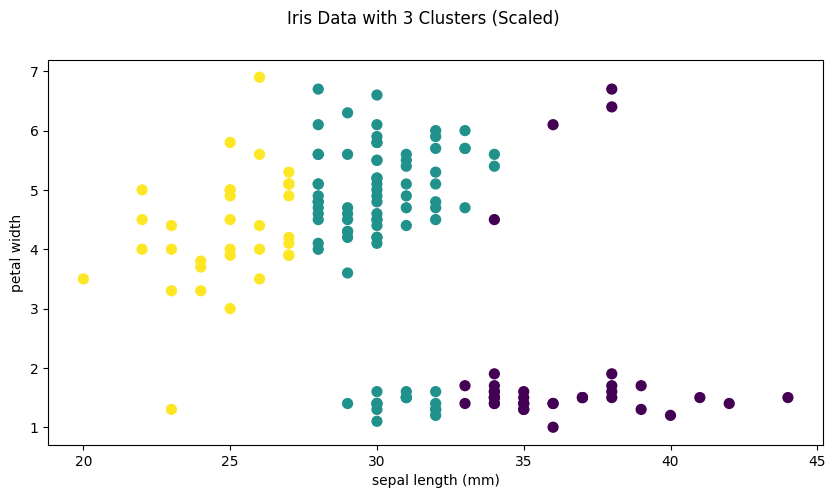

In [1]:
import copy
from sklearn.datasets import load_iris
import numpy as np
import sklearn.preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

irisX, irisy = load_iris(return_X_y=True)
feature_names = ['sepal width','sepal length','petal width','petal length']

# 1. put your code to change the data here (you could print the first few rows of data to see the effect of scaling)
irisXscaled = copy.deepcopy(irisX)
irisXscaled[:, 1:2] *= 10  # Scale sepal length from cm to mm
print("First 5 rows of scaled data:")
print(irisXscaled[:5])

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXscaled in three places
K = 3  # Using same number of clusters as before
cluster_model = KMeans(n_clusters=K, n_init=10)
cluster_model.fit(irisXscaled)
cluster_ids_scaled = cluster_model.predict(irisXscaled)

# 3. then put your visualisation code here - but select x and y from irisXscaled instead of irisX
x_axis_feature = 1  # Looking at scaled feature
y_axis_feature = 2  # Petal width
x = irisXscaled[:, x_axis_feature]
y = irisXscaled[:, y_axis_feature]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, c=cluster_ids_scaled, cmap='viridis', s=50)
ax.set_xlabel(feature_names[x_axis_feature] + " (mm)", fontsize=10)
ax.set_ylabel(feature_names[y_axis_feature], fontsize=10)
fig.suptitle(f"Iris Data with {K} Clusters (Scaled)", fontsize=12)
plt.show()

<div class = "alert alert-warning" style= "color:black">
<h3> Activity 5.2: Using preprocessing so all the features have equal importance in kMeans distance calculations. </h3> 
Read the explanation below then: <ol>
    <li> <b>Add</b> the following lines to your code to get the preprocessed data.<br>
     <code>  scaler = sklearn.preprocessing.MinMaxScaler()
  scaler.fit(irisX)
  irisXnormalised = scaler.transform(irisX)</code>
    </li>
    <li> <b>Rerun </b> the clustering then visualisation for this normalised data and observe the difference.
    </ol>
  </div>

 ### Explanation
 As well as classes for different types of models, sklearn provides many preprocessing classes.  
Like models these implement a 'fit()' method,  but instead of `predict()' they have a 'transform()' method. 

A common way to make each feature equally important is to transform each one so that its values lie between 0 and 1.   
Assuming as usual  we store our set of examples as rows in an array X, with a  column for each features.  
For each individual feature j (column in X) it: 
- finds the highest  and lowest  values in column j of X
- uses these to calculate  the *range* of values in the column range(X[,j]) = max(X[,j] - min(X[,j])  
- subtracts the min(X[,j]) from each value so that they now all start from 0 and the highest value is now max(X[,j] - min(X[,j])
- divide each value by the range(X[,j]) so the upper value  is now 1

If you're feeling confident about numpy arrays and data slicing you could try implementing this your self using a loop over each column (X.shape[1]) and doing slicing making calls to numpy's min(), max() functions.  
There's some clues here:  https://stackoverflow.com/questions/12701659/finding-range-of-a-numpy-array-elements


First 5 rows of normalized data:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


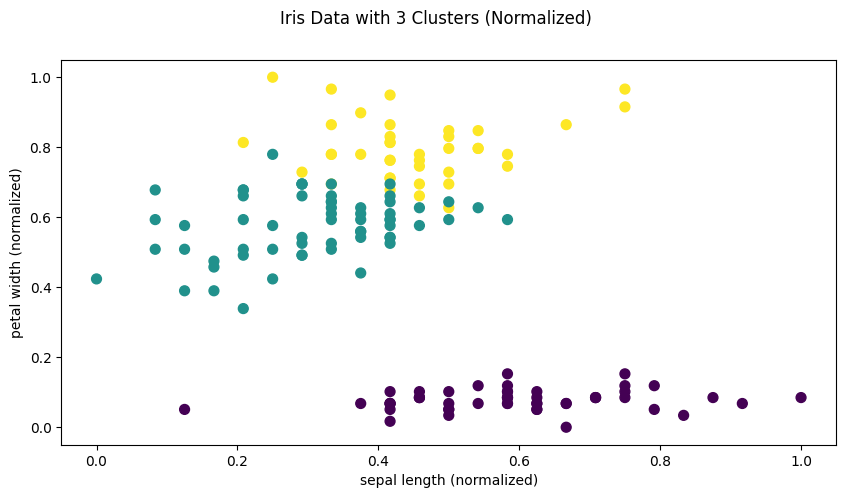

In [2]:
import copy, sklearn
# 1. put your code to change the data here (you could print the first few rows of data to see the effect of normalising)
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(irisX)
irisXnormalised = scaler.transform(irisX)
print("\nFirst 5 rows of normalized data:")
print(irisXnormalised[:5])

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXnormalised in two plces
cluster_model = KMeans(n_clusters=K, n_init=10)
cluster_model.fit(irisXnormalised)
cluster_ids_normalised = cluster_model.predict(irisXnormalised)

# 3. then put your visualisation code here - but select x and y from irisXnormalised instead of irisX
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(irisXnormalised[:, x_axis_feature], irisXnormalised[:, y_axis_feature], 
           c=cluster_ids_normalised, cmap='viridis', s=50)
ax.set_xlabel(feature_names[x_axis_feature] + " (normalized)", fontsize=10)
ax.set_ylabel(feature_names[y_axis_feature] + " (normalized)", fontsize=10)
fig.suptitle(f"Iris Data with {K} Clusters (Normalized)", fontsize=12)
plt.show()

**Decide for yourself which of the three sets of visualisation is clearer**  
Having filled in and run the cell above,  run the cell below and answer the questions to check your understanding

In [3]:
import workbook5_mcq
from IPython.display import display
display(workbook5_mcq.Q5)
display(workbook5_mcq.Q6)